In [42]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("./smart_home_device_usage_data.csv")
data.head()

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


In [3]:
data['DeviceType'].value_counts()

DeviceType
Smart Speaker      1108
Camera             1101
Lights             1087
Security System    1068
Thermostat         1039
Name: count, dtype: int64

In [4]:
data.isna().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [6]:
data[data.duplicated()]

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency


In [7]:
data.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [8]:
data.shape

(5403, 8)

## EDA

In [9]:
energyConsumption = data.groupby('DeviceType')['EnergyConsumption'].sum().sort_values(ascending=True)

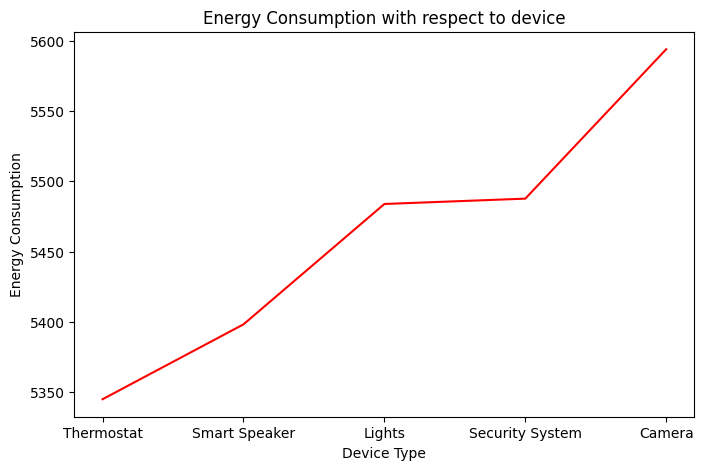

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(energyConsumption, color='red')
plt.xlabel("Device Type")
plt.ylabel("Energy Consumption")
plt.title("Energy Consumption with respect to device")
plt.show()

In [11]:
data['SmartHomeEfficiency'].value_counts()

SmartHomeEfficiency
0    3368
1    2035
Name: count, dtype: int64

<Axes: xlabel='SmartHomeEfficiency'>

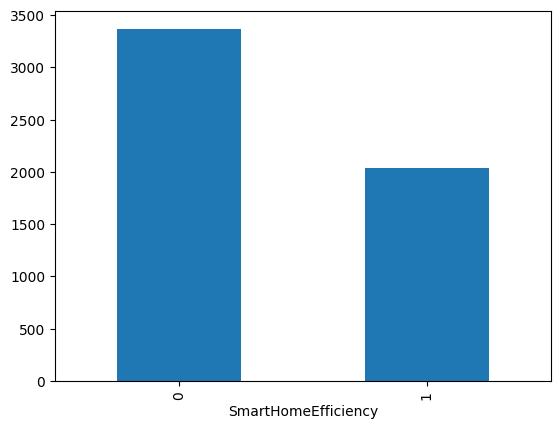

In [12]:
data['SmartHomeEfficiency'].value_counts().plot(kind='bar')

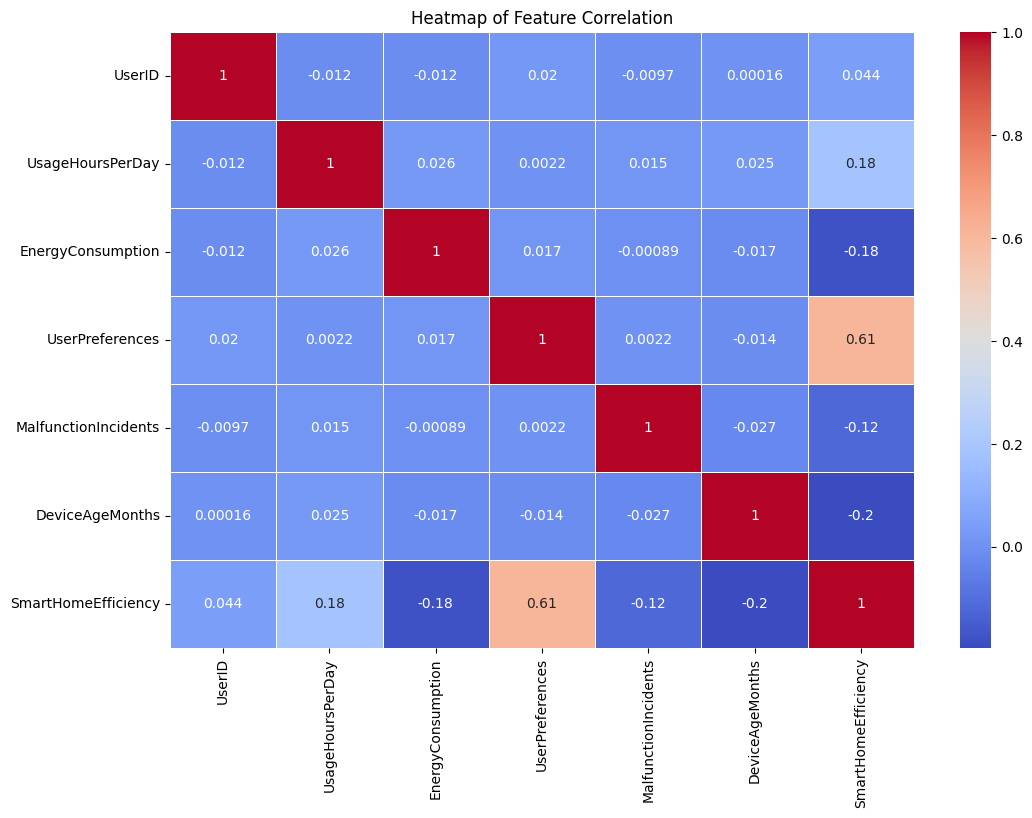

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=data.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Feature Correlation")
plt.show()

## Modelling

In [18]:
X = data.drop(columns='SmartHomeEfficiency')
y = data['SmartHomeEfficiency']

In [19]:
X = pd.get_dummies(data=X, drop_first=True)

In [20]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
X_transformed

array([[-1.73173027,  0.48466369, -1.07434684, ..., -0.49635348,
         1.9688458 , -0.48793886],
       [-1.73108912,  1.17961738,  1.23542512, ..., -0.49635348,
        -0.50791179, -0.48793886],
       [-1.73044798,  1.02147693, -0.83459422, ...,  2.01469322,
        -0.50791179, -0.48793886],
       ...,
       [ 1.73044798, -0.14249446,  0.91134892, ..., -0.49635348,
         1.9688458 , -0.48793886],
       [ 1.73108912, -0.48713994,  0.83845083, ...,  2.01469322,
        -0.50791179, -0.48793886],
       [ 1.73173027,  0.22152427,  1.38562866, ..., -0.49635348,
        -0.50791179,  2.04943712]])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

In [26]:
data.shape

(5403, 8)

In [27]:
X_transformed

array([[-1.73173027,  0.48466369, -1.07434684, ..., -0.49635348,
         1.9688458 , -0.48793886],
       [-1.73108912,  1.17961738,  1.23542512, ..., -0.49635348,
        -0.50791179, -0.48793886],
       [-1.73044798,  1.02147693, -0.83459422, ...,  2.01469322,
        -0.50791179, -0.48793886],
       ...,
       [ 1.73044798, -0.14249446,  0.91134892, ..., -0.49635348,
         1.9688458 , -0.48793886],
       [ 1.73108912, -0.48713994,  0.83845083, ...,  2.01469322,
        -0.50791179, -0.48793886],
       [ 1.73173027,  0.22152427,  1.38562866, ..., -0.49635348,
        -0.50791179,  2.04943712]])

In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [31]:
y_pred=model.predict(X_test)

In [36]:
cm =confusion_matrix(y_true=y_test, y_pred=y_pred);
accuracy_score(y_true=y_test, y_pred=y_pred)

0.9518874907475944

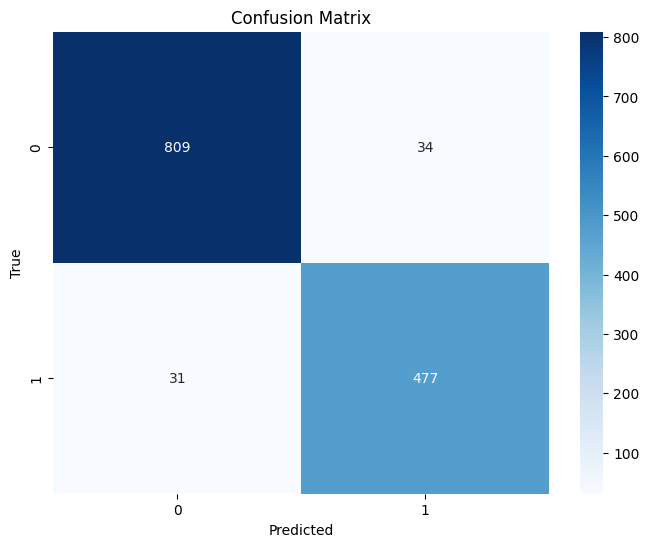

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [44]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       843
           1       0.93      0.94      0.94       508

    accuracy                           0.95      1351
   macro avg       0.95      0.95      0.95      1351
weighted avg       0.95      0.95      0.95      1351



In [45]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2).fit(X_train, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


RandomForestClassifier(n_estimators=50)

In [46]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [47]:
best_model = grid_search.best_estimator_

In [48]:
y_pred_best = best_model.predict(X_test)
print('Confusion Matrix (Optimized Model)')
print(confusion_matrix(y_test, y_pred_best))
print('\n')
print('Classification Report (Optimized Model)')
print(classification_report(y_test, y_pred_best))
print('\n')
print('Accuracy Score (Optimized Model)')
print(accuracy_score(y_test, y_pred_best))

Confusion Matrix (Optimized Model)
[[807  36]
 [ 29 479]]


Classification Report (Optimized Model)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       843
           1       0.93      0.94      0.94       508

    accuracy                           0.95      1351
   macro avg       0.95      0.95      0.95      1351
weighted avg       0.95      0.95      0.95      1351



Accuracy Score (Optimized Model)
0.9518874907475944


In [49]:
baseline_accuracy = accuracy_score(y_test, y_pred)
optimized_accuracy = accuracy_score(y_test, y_pred_best)

print(f'Baseline Model Accuracy: {baseline_accuracy:.2f}')
print(f'Optimized Model Accuracy: {optimized_accuracy:.2f}')

Baseline Model Accuracy: 0.95
Optimized Model Accuracy: 0.95
